# Entrega - Atividade 2

#### Aluno: Matheus Raffaelle Nery Castellucci

### 1.Modifique o Número de Iterações da Convolução no Código convolucao.cpp; Aumente o número de iterações de convolução no código para 30, 50, e 100. Isso aumentará a complexidade computacional, observe como o desempenho do código é afetado por essa modificação.

In [3]:
iteracoes = [15, 30, 50, 100]

tempos_con = [(0.860044 + 0.861254 + 0.859691 + 0.863023 + 0.860481)/5, (1.71097 + 1.7174 + 1.72357 + 1.73622)/4, 2.87459, 5.73062]

tempos_con_buff = [(0.229536 + 0.226574 + 0.228871 + 0.228196 + 0.229233)/5, (0.452884 + 0.454084 + 0.452776 + 0.454677)/4, 0.767339, 1.51019]

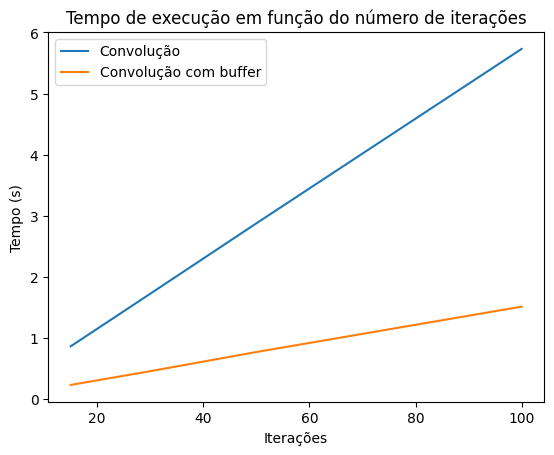

In [4]:
import matplotlib.pyplot as plt

plt.plot(iteracoes, tempos_con, label='Convolução')
plt.plot(iteracoes, tempos_con_buff, label='Convolução com buffer')
plt.title('Tempo de execução em função do número de iterações')
plt.xlabel('Iterações')
plt.ylabel('Tempo (s)')
plt.legend()
plt.show()

### 2.Ajuste o arquivo .slurm para garantir que os recursos de hardware (número de tarefas, CPUs por tarefa, e memória) e o tempo de execução sejam adequados para processar o aumento no número de iterações de convolução. Experimente diferentes configurações de recursos para observar como eles impactam o tempo de execução.

Ao comparar os resultados do Slurm limitado com o Slurm aprimorado, observa-se que, à medida que o número de iterações aumenta, o tempo de execução também cresce. No entanto, no caso do Slurm aprimorado (com maior alocação de recursos, incluindo mais tarefas executadas simultaneamente, mais CPUs por tarefa e o dobro de memória), os tempos de execução são significativamente menores em comparação ao cenário do Slurm limitado.

A disponibilidade de diferentes recursos pode fazer uma grande diferença nesse cenário. Quando você tem mais CPUs por tarefa, o trabalho é distribuído de forma mais eficiente, o que faz com que as tarefas sejam concluídas mais rapidamente. Além disso, com mais memória disponível, os processos que lidam com grandes volumes de dados não ficam travados, já que há menos necessidade de usar o swap de memória, reduzindo os tempos de espera. E se você consegue executar mais tarefas ao mesmo tempo, o processamento termina ainda mais rápido, especialmente quando dá para aproveitar a paralelização. Portanto, configurar e alocar bem os recursos no Slurm pode melhorar bastante o desempenho, agilizando o tempo de execução das operações.

Apesar de tudo isso, é importante ressaltar que a alocação de recursos deve ser feita de forma equilibrada, para evitar desperdício de recursos e garantir que o sistema continue funcionando de forma eficiente. Por exemplo, ao alocar muita memória para os arquivos que estamos mexendo, nem podemos perceber uma melhora significativa no desempenho, já que o gargalo pode estar em outro lugar. Portanto, é importante fazer testes e ajustes para encontrar a melhor configuração de recursos para cada situação.

### 3.Gere um gráfico comparando o tempo de execução do algoritmo para cada número de iterações. Analise o impacto da alocação de mais recursos, como o número de CPUs e a quantidade de memória, no tempo de execução.

In [9]:
# Tudo foi feito com 100 iterações
ram = [512, 1024, 2048, 4096]

tempos_con_ram = [1.52848, 1.53391, 1.53215, 1.53562]

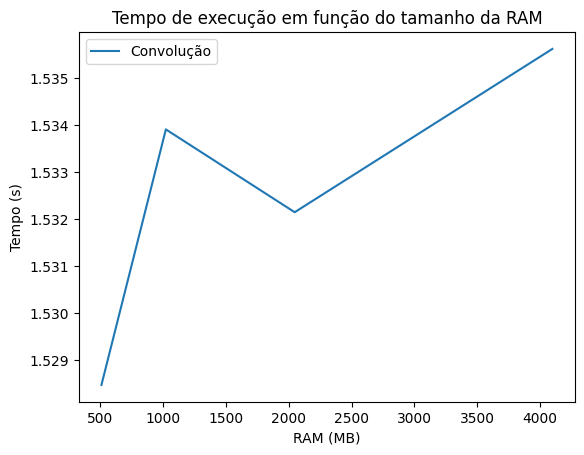

In [10]:
plt.plot(ram, tempos_con_ram, label='Convolução')
plt.title('Tempo de execução em função do tamanho da RAM')
plt.xlabel('RAM (MB)')
plt.ylabel('Tempo (s)')
plt.legend()
plt.show()

Podemos tirar ado código que para um processo tão pequeno como o nosso, não é necessária uma grande quantidade de memória. 

Queria fazer um teste com variação de CPU para ver o que aconteceria, mas não deu :( . Acredito que sim teria uma diminuição de tempo, mas praticamente não seria perceptível.

### 4.Explore e explique como os comandos sinfo, squeue, sprio, srun, sstat, e strigger podem ser utilizados para monitorar e gerenciar jobs no cluster.

sinfo: Exibe informações sobre o estado das filas e dos nós do cluster. Com ele, você pode monitorar quais filas estão disponíveis, quais estão ativas, e o estado atual dos nós, permitindo uma visão geral do ambiente de processamento.

squeue: Lista os jobs atualmente na fila, sejam eles aguardando para iniciar ou já em execução. Este comando é útil para monitorar os jobs submetidos, verificar seus status e identificar quais jobs estão consumindo recursos.

sprio: Mostra a prioridade dos jobs na fila. Isso ajuda a entender como o SLURM está priorizando os jobs e a identificar por que um job pode estar demorando para começar.

srun: Utilizado para iniciar jobs interativamente no cluster. Diferente do sbatch, que submete um script para execução em segundo plano, o srun executa o job em tempo real, ideal para testes e execuções imediatas.

sstat: Exibe estatísticas de jobs em execução, como uso de CPU e memória. Ele é usado para monitorar o desempenho dos jobs em tempo real, garantindo que estão utilizando os recursos de forma eficiente.

strigger: Configura gatilhos baseados em eventos específicos, como o início ou término de um job. Esses gatilhos podem ser úteis para automatizar respostas a eventos ou para depurar scripts.